In [0]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
from keras.models import load_model
import glob
import matplotlib.pyplot as plt

In [0]:
np.set_printoptions(suppress=True)

In [4]:
model = tensorflow.keras.models.load_model('keras_model.h5')

In [0]:
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [0]:
input_images = glob.glob('Input_Images/*.jpg')

In [0]:
size = (224, 224)

img_prediction = {}

for image in input_images:

  str_image = image

  image = Image.open(image)

  image = ImageOps.fit(image, size, Image.ANTIALIAS)

  image_array = np.asarray(image)

  image.show()

  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

  data[0] = normalized_image_array

  prediction = model.predict(data)
  prediction = np.delete(prediction, 4)

  img_prediction[str_image[13:]] = prediction

Label = ['Red', 'Blue', 'Black', 'Yellow', 'Green', 'Violet']

In [73]:
print(img_prediction)

{'Yellow.jpg': array([0.00465363, 0.00000326, 0.0000066 , 0.9950389 , 0.0000076 ,
       0.00019078], dtype=float32), 'Blue.jpg': array([0.00000029, 0.9985037 , 0.0008369 , 0.00000137, 0.0006047 ,
       0.00000506], dtype=float32), 'Green.jpg': array([0.00037358, 0.12178327, 0.00000648, 0.02795568, 0.77055603,
       0.00187747], dtype=float32), 'Red.jpg': array([0.9991013 , 0.00000528, 0.00002125, 0.00086584, 0.00000003,
       0.00000646], dtype=float32), 'Black.jpg': array([0.1913245 , 0.00005842, 0.7995934 , 0.00002696, 0.00000004,
       0.00899638], dtype=float32), 'Violet.jpg': array([0.03695359, 0.04489042, 0.00097228, 0.01575991, 0.0001451 ,
       0.8982387 ], dtype=float32)}


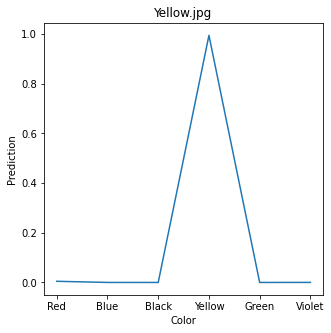

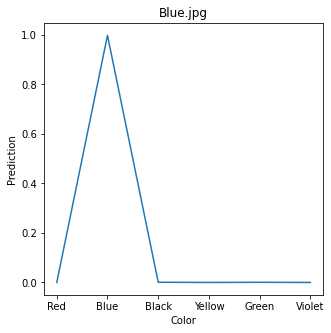

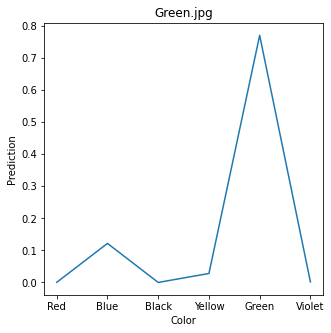

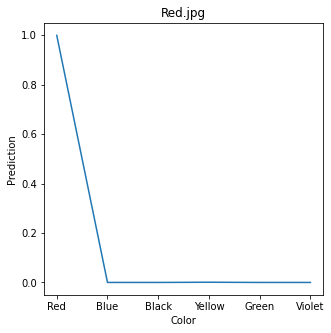

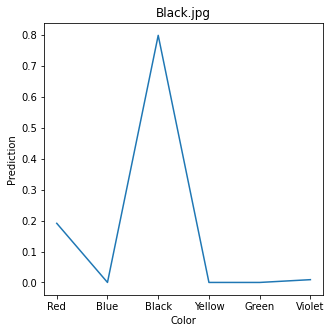

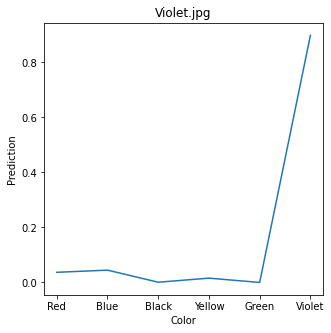

In [78]:
prediction_keys = list(img_prediction.keys())

for pos in range(1, 7):
  x, y = Label, img_prediction[prediction_keys[pos-1]]
  plt.figure(figsize=(5, 5))
  plt.plot(x,y)
  plt.xlabel('Color')
  plt.ylabel('Prediction')
  plt.title(prediction_keys[pos-1])
  plt.show()